# Bài tập tuần 11
Sử dụng 1 bộ dữ liệu time-series bất kì (1 biến hoặc nhiều biến). tại link (https://github.com/thieu1995/csv-files/).

Chọn một model regression bất kì trên scikit-learn (https://scikit-learn.org/stable/search.html?q=regression)

Áp dụng các kĩ thuật trên lớp vào bộ dữ liệu time-series trên.

Scaling, (1 điểm)

Building, (1 điểm)

Hyper-parameter tuning, (2 điểm)

Pipeline, (1 điểm)

GridsearchCV, (1 điểm)

Forecasting, (1 điểm)

Calculate Metrics ví dụ như RMSE, MSE, MAE, MAPE (2 điểm)

Vẽ đồ thị giá trị thực tế và dự đoán (1 điểm)



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

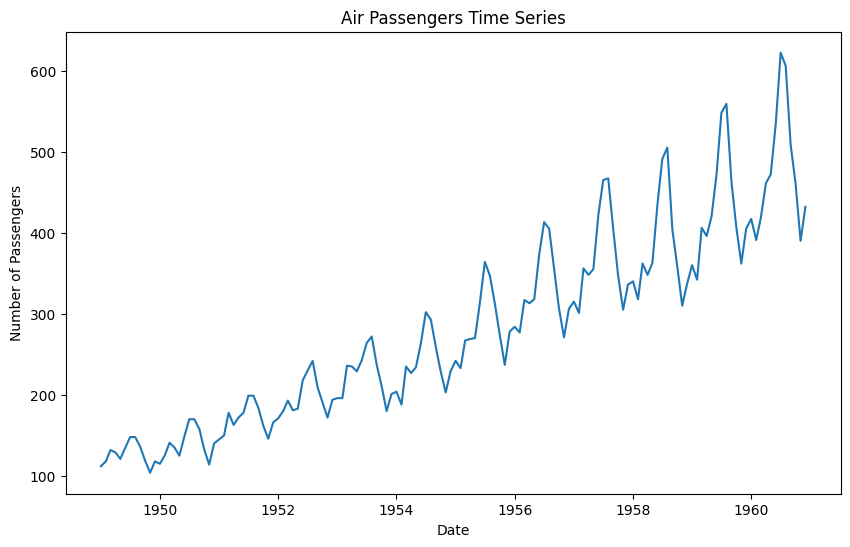

In [15]:
# Load the dataset
file_path = 'AirPassengers.csv'
data = pd.read_csv(file_path)

# Convert the 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data = data.asfreq('MS')

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Air Passengers Time Series')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

In [13]:
# Feature engineering: create lag features
data['Lag1'] = data['#Passengers'].shift(1)
data['Lag2'] = data['#Passengers'].shift(2)
data['Lag3'] = data['#Passengers'].shift(3)
data.dropna(inplace=True)

# Split the data into train and test sets
X = data[['Lag1', 'Lag2', 'Lag3']]
y = data['#Passengers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Building a regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [23]:
# Define a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Define the hyper-parameter grid
param_grid = {
    'regressor__fit_intercept': [True, False]
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')


Best parameters: {'regressor__fit_intercept': True}


In [25]:
# Forecasting
y_pred = best_model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')


RMSE: 48.317551199347136
MSE: 2334.585753901532
MAE: 40.71514590059161
MAPE: 0.09403693878720362


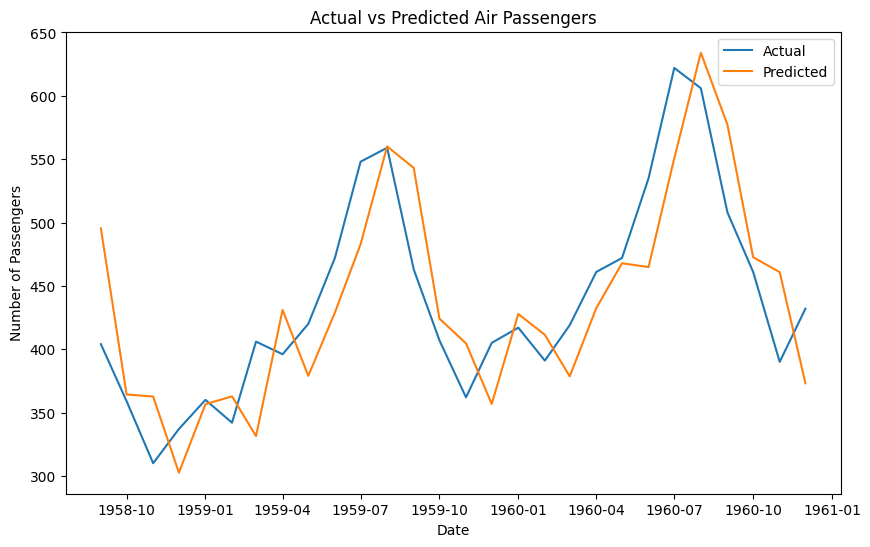

In [26]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Actual vs Predicted Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')

plt.legend()
plt.show()
